# Exercises Sheet 3 Reinforcement Learning

# Ex 1

Iteration 0
  O                
                   
                   
                   
                   
                   
                   
                   
                   
                  X

--------------------
Iteration 100
                   
                   
                   
                   
                  O
                   
                   
                   
                   
                  X

--------------------
Iteration 200
                   
                   
                   
                   
                   
                   
                   
                   
      O            
                  X

--------------------
Iteration 300
                   
                   
                   
                   
        O          
                   
                   
                   
                   
                  X

--------------------
Iteration 400
                   
    O              
    

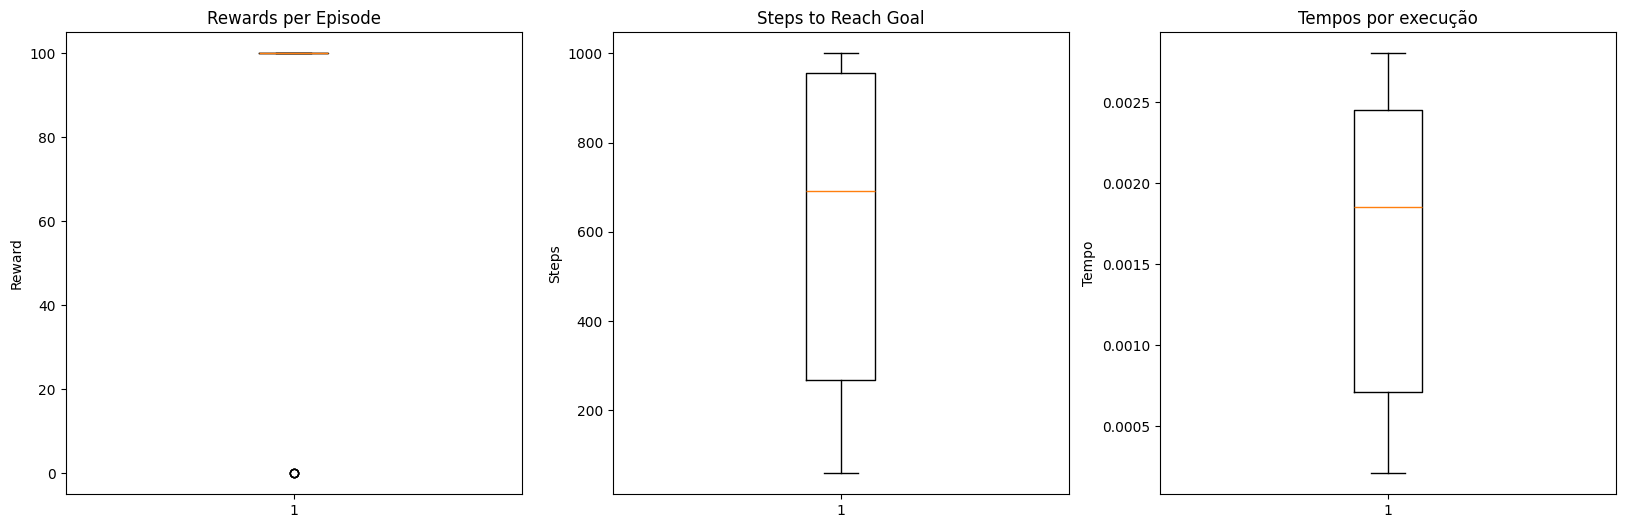

Average Reward per Episode: 86.66666666666667
Average Steps to Goal: 610.6
Standard Deviation of Steps: 336.38129159234364


In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time  # Optional delay for visualizing matrix updates

class Environment:
    def __init__(self):
        # Define the grid size and initialize the field matrix
        self.field = np.zeros((10, 10), dtype=str)  # 10x10 grid initialized as empty
        self.field[:] = ' '  # Fill with empty spaces
        self.goal_state = [9, 9]  # Goal at bottom-right corner
        self.max_steps = 1000  # Maximum steps per episode

    def transition(self, state, action):
        """State transition function based on action (up, down, left, right)."""
        # Apply the action, updating the agent's row or column position
        if action == "up" and state[0] > 0: # linhas
            state[0] -= 1 # linhas - 1
        elif action == "down" and state[0] <  self.field.shape[0] - 1: # linhas
            state[0] += 1 # linhas + 1
        elif action == "left" and state[1] > 0:
            state[1] -= 1 # colunas - 1
        elif action == "right" and state[1] < self.field.shape[1] - 1:
            state[1] += 1 # colunas + 1
        return state

    def reward(self, state):
        """Reward function: 100 if goal is reached, otherwise 0."""
        return 100 if state == self.goal_state else 0

    def print_matrix(self, agent_state):
        """Print the field with 'O' for the agent and 'X' for the goal."""
        # Create a copy of the field to modify for printing
        display_field = self.field.copy()
        # Mark the agent's and goal's positions
        display_field[agent_state[0], agent_state[1]] = 'O'
        display_field[self.goal_state[0], self.goal_state[1]] = 'X'
        
        # Print each row of the matrix
        for row in display_field:
            print(' '.join(row))
        print("\n" + "-" * 20)  # Divider between prints

class Agent:
    def __init__(self, environment):
        self.env = environment
        self.current_state = [0, 0]  # Starting position at top-left corner
        self.actions = ["up", "down", "left", "right"]

    def choose_random_action(self):
        """Randomly select an action."""
        return random.choice(self.actions)

    def reset(self):
        """Reset the agent to the starting position."""
        self.current_state = [0, 0]

    def run_episode(self):
        """Run an episode until goal is reached or max steps are exceeded."""
        inicio = time.time()
        total_reward = 0
        steps = 0

        for i in range(self.env.max_steps):
            action = self.choose_random_action()
            new_state = self.env.transition(self.current_state, action)
            total_reward += self.env.reward(new_state)
            steps += 1
            

            # Print the matrix every 100 iterations
            if i % 100 == 0:
                print(f"Iteration {i}")
                self.env.print_matrix(self.current_state)

            # Check if goal state is reached
            if self.current_state == self.env.goal_state:
                print("Reached the goal!")
                break

        self.reset()
        fim = time.time()
        dif = fim - inicio
        return total_reward, steps, dif

# Run simulation for 30 episodes
def simulate(agent, num_episodes=30):
    rewards, steps_list, dif_list = [], [], []

    for _ in range(num_episodes):
        reward, steps, diferenca = agent.run_episode()
        rewards.append(reward)
        steps_list.append(steps)
        dif_list.append(diferenca)

    print(f"Reward: {rewards}")
    print(f"Steps: {steps_list}")
    print(f"tempos: {dif_list}")

    return rewards, steps_list, dif_list


def plot_analyze(rewards, steps_list, diferenca):
    """Use to analyze results."""
    # Calculate statistics
    avg_reward = np.mean(rewards)
    avg_steps = np.mean(steps_list)
    std_steps = np.std(steps_list)
    avg_dif = np.mean(diferenca)

    # Plotting the results
    fig, ax = plt.subplots(1, 3, figsize=(20, 6))

    ax[0].boxplot(rewards, vert=True)
    ax[0].set_title("Rewards per Episode")
    ax[0].set_ylabel("Reward")

    ax[1].boxplot(steps_list, vert=True)
    ax[1].set_title("Steps to Reach Goal")
    ax[1].set_ylabel("Steps")

    ax[2].boxplot(diferenca, vert=True)
    ax[2].set_title("Tempos por execução")
    ax[2].set_ylabel("Tempo")
    
    plt.show()

    print(f"Average Reward per Episode: {avg_reward}")
    print(f"Average Steps to Goal: {avg_steps}")
    print(f"Standard Deviation of Steps: {std_steps}")

# Initialize environment and agent
env = Environment()
agent = Agent(env)

# Run the simulation
rewards, steps_list, diferenca = simulate(agent)
plot_analyze(rewards, steps_list,diferenca)

# Ex 2

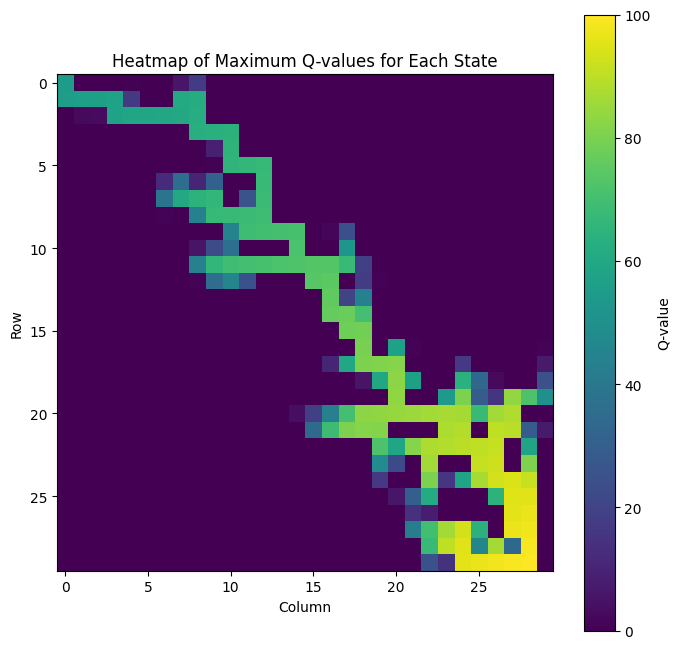

[[5.52683477e+01 0.00000000e+00 2.54927256e-02 0.00000000e+00
  4.49764697e-01 0.00000000e+00 0.00000000e+00 5.90113288e+00
  1.75160459e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.58266139e+01 5.63905190e+01 5.69601202e+01 5.75354750e+01
  1.71685082e+01 0.00000000e+00 0.00000000e+00 6.11117240e+01
  6.17290141e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.70343620e+00 3.03189253e+00 5.81166414e+01
  5.

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

a = 0.7
y = 0.99
greed = 1 # if closer to 1, then it goes to the best option

class Environment2:
    def __init__(self, size=30): # default should be 10
        # Define the grid size and initialize the field matrix
        self.field = np.zeros((size, size), dtype=str)  # 10x10 grid initialized as empty
        self.field[:] = ' '  # Fill with empty spaces
        self.size = size

        self.goal_state = [size-1, size-1]  # Goal at bottom-right corner
        self.max_steps = size * 2000  # Maximum steps per episode

        # Print the field
        self.print_field()

    def add_walls(self):
        # Add the vertical walls
        self.field[1:, self.size-4] = 'W'  # Wall bottom up
        self.field[:-1, 3] = 'W'  # Wall from top to bottom

    #def add_walls(self):
        # Define the vertical walls using the dimensions of self.field
    #    self.field[:-1, self.field.shape[1] - 2] = 'W'  # Wall from top to bottom in the second column from the right
    #    self.field[1:, 1] = 'W'  # Wall from bottom up in the second column from the left


    def print_field(self):
        for row in self.field:
            print(' '.join(row))
        print()
    
    '''def transfake(self, state, action):
        """State transition function based on action (up, down, left, right)."""
        # Apply the action, updating the agent's row or column position
        if action == 0 and state[0] > 0: # linhas
            return [state[0]-1,state[1]]
        elif action == 1 and state[0] < len(self.field[0]) - 1: # linhas
            return [state[0] +1,state[1]]
        elif action == 2 and state[1] > 0:
            return [state[0],state[1] -1]
        elif action == 3 and state[1] < len(self.field[0]) - 1:
            return [state[0] ,state[1] +1]
        return state'''

    def trans_with_walls(self, state, action, random_miss_prob=0):
        """State transition function with walls, boundary checks, and random miss probability."""
        new_state = state.copy()
        reward = 0  # Default reward

        # Randomly decide if the action should be a 'miss'
        if np.random.rand() < random_miss_prob:
            # Choose a random valid action instead
            action = np.random.choice([0, 1, 2, 3])

        # Determine the target state based on the (potentially missed) action
        if action == 0 and state[0] > 0:  # Up
            new_state = [state[0] - 1, state[1]]
        elif action == 1 and state[0] < len(self.field) - 1:  # Down
            new_state = [state[0] + 1, state[1]]
        elif action == 2 and state[1] > 0:  # Left
            new_state = [state[0], state[1] - 1]
        elif action == 3 and state[1] < len(self.field[0]) - 1:  # Right
            new_state = [state[0], state[1] + 1]
        
        # Check for walls or out-of-bounds attempts
        if self.field[new_state[0], new_state[1]] == 'W' or new_state == state:
            reward = -0.1  # Penalty for invalid move
            new_state = state  # Stay in the same position

        return new_state, reward


    def reward(self, state):
        """Reward function: 100 if goal is reached, otherwise 0."""
        return 100 if state == self.goal_state else 0

    def print_matrix(self, agent_state):
        """Print the field with 'O' for the agent and 'X' for the goal."""
        # Create a copy of the field to modify for printing
        display_field = self.field.copy()
        # Mark the agent's and goal's positions
        display_field[agent_state[0], agent_state[1]] = 'O'
        display_field[self.goal_state[0], self.goal_state[1]] = 'X'
        
        # Print each row of the matrix
        for row in display_field:
            print(' '.join(row))
        print("\n" + "-" * 20)  # Divider between prints

class Agent2:
    def __init__(self, environment):
        self.q = np.zeros((environment.field.shape[1], environment.field.shape[0], 4))
        self.env = environment
        self.current_state = [0, 0]  # Starting position at top-left corner
        self.actions = [0,1,2,3]

    def reset_q(self): 
        self.q = np.zeros((self.env.field.shape[1], self.env.field.shape[0], 4))

    def choose_random_action(self):
        """Randomly select an action."""
        return random.choice(self.actions)

    def reset(self):
        """Reset the agent to the starting position."""
        self.current_state = [0, 0]

    def run_episode(self, random_miss_prob=0):
        """Run an episode until goal is reached or max steps are exceeded."""
        total_reward = 0
        steps = 0

        for i in range(self.env.max_steps):
            q_partido = self.q[self.current_state[0], self.current_state[1]]
            # ex 2 b)
            
            # greed
            if np.random.rand() > greed:
                action = self.choose_random_action()
            else:
                # Se todas as opções forem iguais, escolhe uma aleatoriamente à mesma
                if np.all(q_partido == q_partido[0]):
                    action = self.choose_random_action()
                else:
                    #action = self.choose_random_action()
                    action = np.argmax(q_partido)

            new_state, walls_reward = self.env.trans_with_walls(self.current_state, action, random_miss_prob=random_miss_prob)
            total_reward += walls_reward
            total_reward += self.env.reward(new_state)
            steps += 1

            current_q = self.q[self.current_state[0], self.current_state[1], action]
            next_max_q = np.max(self.q[new_state[0], new_state[1], :])
            updated_q = (1 - a) * current_q + a * (self.env.reward(new_state) + y * next_max_q)
            
            self.q[self.current_state[0], self.current_state[1], action] = updated_q

            self.current_state = new_state

            # Check if goal state is reached
            if self.current_state == self.env.goal_state:
                # print("Reached the goal! ", end = '')
                break

        self.reset()
        return total_reward, steps, self.q

    def run_episode_increasing_greed(self, current_episode, num_episodes, start_iteration=0.3, start_greed=0.3, random_miss_prob=0):
        """Run an episode until goal is reached or max steps are exceeded."""
        total_reward = 0
        steps = 0
        #greed = 0.3

        for i in range(self.env.max_steps):
            # Set greed to 0.3 for the first 30% of steps, then increase it based on current episode
            if (current_episode / num_episodes) < start_iteration:
                greed = start_greed
            else:
                greed = start_greed + (1-start_greed) * (current_episode / num_episodes)

            # print(f"current episode: {current_episode}, current greed: {greed} | ", end = '')

            q_partido = self.q[self.current_state[0], self.current_state[1]]
            # ex 2 b)
            
            # greed
            if np.random.rand() > greed:
                action = self.choose_random_action()
            else:
                # Se todas as opções forem iguais, escolhe uma aleatoriamente à mesma
                if np.all(q_partido == q_partido[0]):
                    action = self.choose_random_action()
                else:
                    #action = self.choose_random_action()
                    action = np.argmax(q_partido)

            new_state, walls_reward = self.env.trans_with_walls(self.current_state, action, random_miss_prob=random_miss_prob)
            total_reward += walls_reward
            total_reward += self.env.reward(new_state)
            steps += 1

            current_q = self.q[self.current_state[0], self.current_state[1], action]
            next_max_q = np.max(self.q[new_state[0], new_state[1], :])
            updated_q = (1 - a) * current_q + a * (self.env.reward(new_state) + y * next_max_q)
            
            self.q[self.current_state[0], self.current_state[1], action] = updated_q


            self.current_state = new_state

            # Check if goal state is reached
            if self.current_state == self.env.goal_state:
                # print("Reached the goal! ", end = '')
                break

        self.reset()
        return total_reward, steps, self.q

# Run simulation for 30 episodes
def simulate2(agent, num_episodes=500, random_miss_prob=0):
    rewards, steps_list, q_lista = [], [], []

    for current_episode in range(num_episodes):
        reward, steps, q = agent.run_episode(random_miss_prob=random_miss_prob)
        rewards.append(reward)
        steps_list.append(steps)
        q_lista.append(q)

    #print(f"Reward: {rewards}")
    #print(f"Steps: {steps_list}")
    #print(f"Q: {q_lista}")

    # print(np.mean(q_lista, axis=0))

    return rewards, steps_list, q_lista

def heat_matrix(q_table):
    """
    Generate a matrix where each cell contains the maximum Q-value of all actions for that state.
    """
    # Calculate the maximum Q-value for each state by taking the max across the actions axis (axis=2)
    heatmap_matrix = np.max(q_table, axis=2)
    return heatmap_matrix

def plot_heatmap(heatmap_matrix):
    plt.figure(figsize=(8, 8))
    plt.imshow(heatmap_matrix, cmap='viridis', interpolation='nearest')
    plt.colorbar(label="Q-value")
    plt.title("Heatmap of Maximum Q-values for Each State")
    plt.xlabel("Column")
    plt.ylabel("Row")
    plt.show()


ambiente = Environment2()
agente = Agent2(ambiente)

rewards, steps_list, lista_q = simulate2(agente)

my_heat_matrix = heat_matrix(agente.q)

plot_heatmap(my_heat_matrix)
print(my_heat_matrix)

agente.reset_q()



Greed at 0.5:


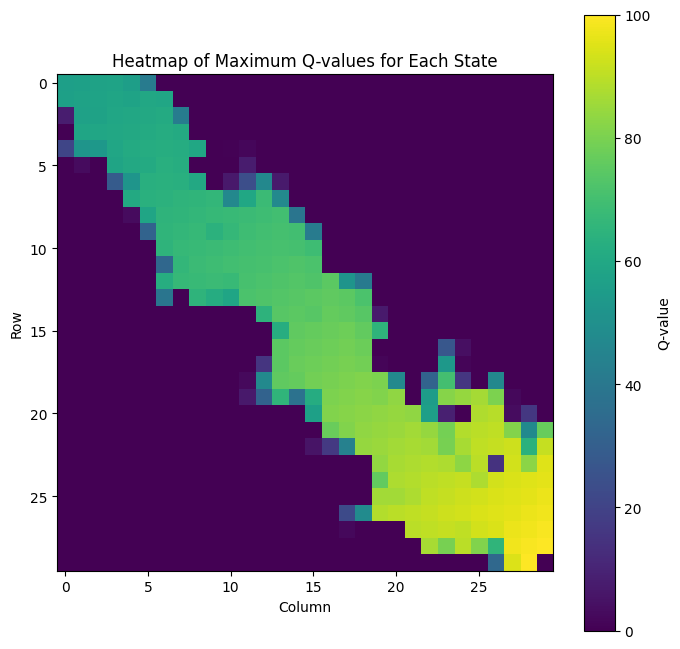

[[ 56.39051905  56.96012025  57.535475    58.11664141  55.87917169
   41.50483065   0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [ 56.82170059  57.535475    58.11664141  58.70367819  58.11664141
   59.89549075  59.22186075   0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  7.96055846  57.30596831  57.535475    59.29664464  59.89560065
   60.50060671  61.11172395  41.97122072   0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.        

In [3]:
greed = 0.8

print("Greed at 0.5:")

rewards, steps_list, lista_q = simulate2(agente)

my_heat_matrix = heat_matrix(agente.q)

plot_heatmap(my_heat_matrix)
print(my_heat_matrix)

agente.reset_q()

Greed at 0.1: (very random)


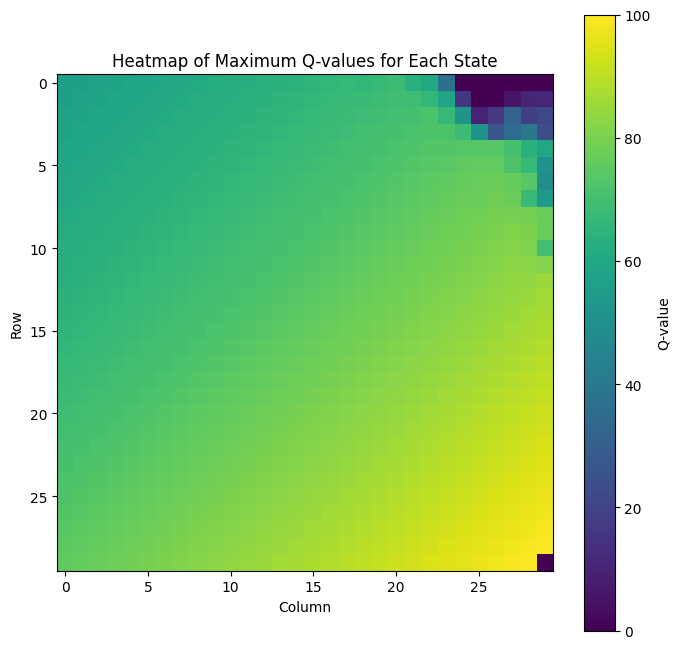

[[ 56.39051905  56.96012025  57.535475    58.11664141  58.70367819
   59.29664464  59.89560065  60.50060671  61.11172395  61.72901346
   62.35253409  62.98141422  63.58481717  64.25635126  64.70644402
   65.44296895  66.21144389  66.86470742  66.04270481  67.09445402
   68.53427143  63.32345556  60.85043569  37.03778109   0.
    0.           0.           0.           0.           0.        ]
 [ 56.96012025  57.535475    58.11664141  58.70367819  59.29664464
   59.89560065  60.50060671  61.11172395  61.72901409  62.35253948
   62.98236312  63.61854709  64.25990962  64.90910405  65.55845041
   66.22778406  66.89708676  67.57286512  67.90601737  68.53424127
   69.42951228  69.06757107  66.39423216  58.26266898  16.12449508
    0.7051081    0.           5.49192008  10.30230317  11.43556796]
 [ 57.535475    58.11664141  58.70367819  59.29664464  59.89560065
   60.50060671  61.11172395  61.72901409  62.35253949  62.98236312
   63.61854861  64.26116021  64.91026283  65.56592047  66.22814611
 

In [4]:
agente.reset_q()
greed = 0.1

print("Greed at 0.1: (very random)")

rewards, steps_list, lista_q = simulate2(agente)

my_heat_matrix = heat_matrix(agente.q)

plot_heatmap(my_heat_matrix)
print(my_heat_matrix)

agente.reset_q()

Increasing from 30\% of the tests


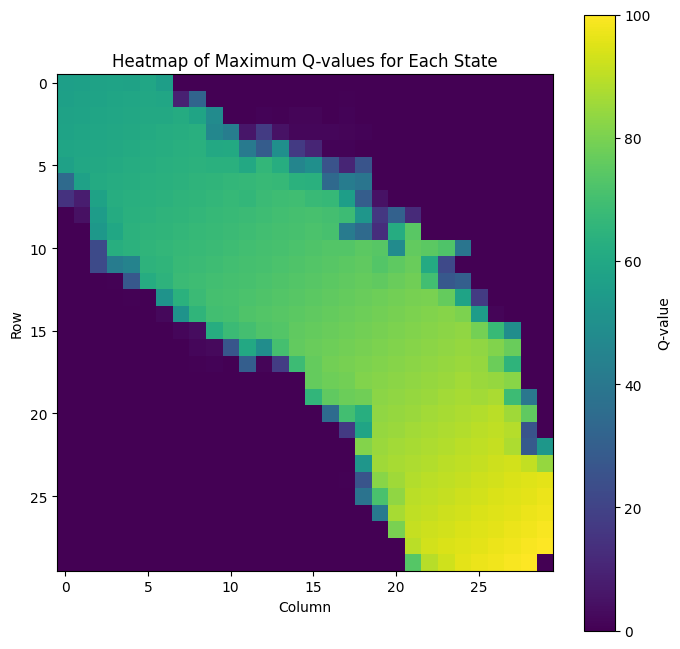

[[5.63905190e+01 5.69601202e+01 5.75354749e+01 5.81085660e+01
  5.76343256e+01 5.92247699e+01 5.60145814e+01 0.00000000e+00
  0.00000000e+00 5.02775132e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.69601202e+01 5.75354750e+01 5.81166414e+01 5.87036780e+01
  5.92902757e+01 5.98953617e+01 5.92544152e+01 9.36232011e+00
  3.23784919e+01 3.17979422e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 5.12469758e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.75354750e+01 5.81166414e+01 5.87036782e+01 5.92966446e+01
  5.

In [5]:
agente.reset_q()
greed = 0.3

# Run simulation for 30 episodes
def simulate_increasing_greed(agent, start_iteration=0.3, start_greed=0.3, num_episodes=500, random_miss_prob=0):
    rewards, steps_list, q_lista = [], [], []

    for current_episode in range(num_episodes):
        reward, steps, q = agent.run_episode_increasing_greed(current_episode, num_episodes, start_iteration=start_iteration, start_greed=start_greed, random_miss_prob=random_miss_prob)
        #reward, steps, q = agent.run_episode()
        rewards.append(reward)
        steps_list.append(steps)
        q_lista.append(q)

    return rewards, steps_list, q_lista  # Ensure the function returns the values

# greed = 0.1

print("Increasing from 30\% of the tests")

rewards, steps_list, lista_q = simulate_increasing_greed(agente, start_iteration=0.3, start_greed=0.3)

my_heat_matrix = heat_matrix(agente.q)

plot_heatmap(my_heat_matrix)
print(my_heat_matrix)

agente.reset_q()

# Ex 4

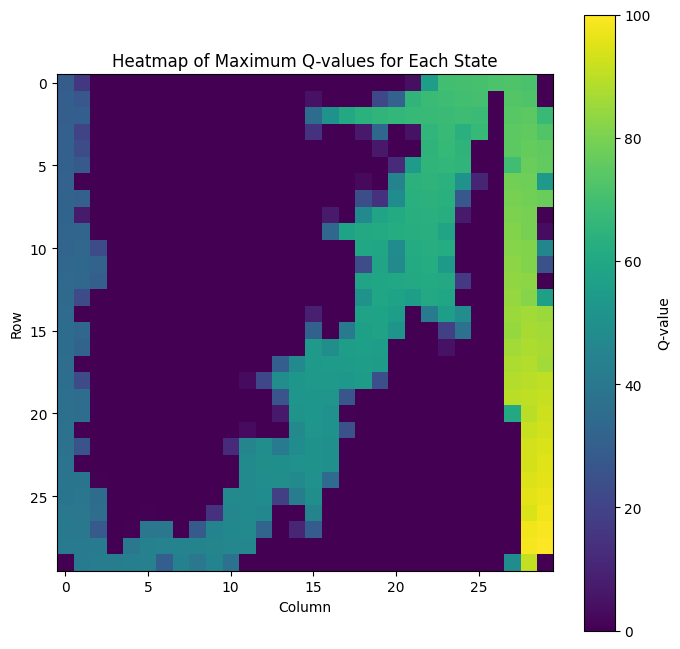

[[2.96386587e+01 1.61557633e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.91697926e+00 5.54704665e+01 6.96268091e+01
  7.03447695e+01 7.10553227e+01 7.17730533e+01 7.24980336e+01
  7.13588135e+01 0.00000000e+00]
 [2.99380391e+01 2.71721034e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 4.97762328e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 2.15818707e+01
  3.14506318e+01 6.55527676e+01 6.82554595e+01 6.89449086e+01
  6.96413218e+01 7.03433849e+01 0.00000000e+00 7.32303370e+01
  7.24980333e+01 0.00000000e+00]
 [3.02404436e+01 2.99163507e+01 0.00000000e+00 0.00000000e+00
  0.

In [6]:
agente.reset_q()

agente.env.add_walls()

rewards, steps_list, lista_q = simulate_increasing_greed(agente, start_iteration=0.3, start_greed=0.91)

my_heat_matrix = heat_matrix(agente.q)

plot_heatmap(my_heat_matrix)
print(my_heat_matrix)

agente.reset_q()

# Ex 5

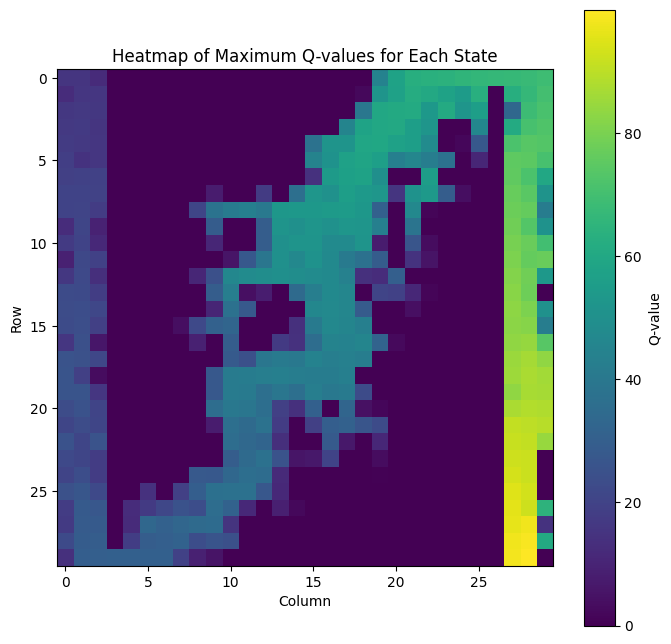

[[1.55086944e+01 1.55649147e+01 1.22741382e+01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 4.41481694e+01
  5.75823203e+01 6.25913926e+01 6.33873163e+01 6.43497320e+01
  6.53865426e+01 6.62577421e+01 6.67544879e+01 6.70917105e+01
  6.77276567e+01 6.88109391e+01]
 [1.28343739e+01 1.57062971e+01 1.59373630e+01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 2.37879093e-01 2.32897495e+00 5.18193016e+01
  5.71527633e+01 6.19002523e+01 6.02076842e+01 5.76714294e+01
  5.46828320e+01 6.31163203e+01 0.00000000e+00 6.28233715e+01
  6.65396069e+01 7.01059932e+01]
 [1.61233645e+01 1.65372523e+01 1.62183182e+01 0.00000000e+00
  0.

In [7]:
agente.reset_q()

# agente.env.add_walls()

rewards, steps_list, lista_q = simulate_increasing_greed(agente, start_iteration=0.3, start_greed=0.91, random_miss_prob=0.05)

my_heat_matrix = heat_matrix(agente.q)

plot_heatmap(my_heat_matrix)
print(my_heat_matrix)

agente.reset_q()